In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import pandas as pd

In [15]:
data = np.array([3, 6, 2, 9, 5, 6, 6, 13, 11, 1, 16, 14, 41,56])

In [17]:
# Calculate quartiles and IQR
Q1 = np.percentile(data, 25)
Q3 = np.percentile(data, 75)
IQR = Q3 - Q1
print(IQR)

8.5


In [18]:
# Identify outliers using IQR method
iqr_threshold = 1.5
outliers_iqr = np.where((data < (Q1 - iqr_threshold * IQR)) | (data > (Q3 + iqr_threshold * IQR)))[0]
outliers_iqr

array([12, 13])

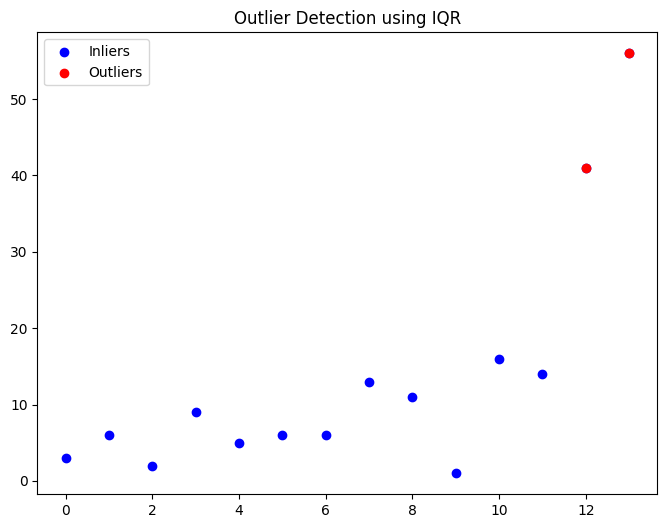

In [19]:
# Visualize outliers

plt.figure(figsize=(8, 6))
plt.scatter(range(len(data)), data, c='blue', label='Inliers')
plt.scatter(outliers_iqr, data[outliers_iqr], c='red', label='Outliers')
plt.title("Outlier Detection using IQR")
plt.legend()
plt.show()

In [20]:
#By Z score
from scipy.stats import zscore

In [22]:
# Given data

data = np.array([3, 6, 2, 9, 5, 6, 6, 13, 11, 1, 16, 14, 41,56])
data

array([ 3,  6,  2,  9,  5,  6,  6, 13, 11,  1, 16, 14, 41, 56])

In [23]:
z_scores = zscore(data)
z_scores

array([-0.69068912, -0.49334937, -0.75646904, -0.29600962, -0.55912929,
       -0.49334937, -0.49334937, -0.03288996, -0.16444979, -0.82224895,
        0.16444979,  0.03288996,  1.8089477 ,  2.79564644])

In [24]:
z_threshold = 2
outliers_zscore = np.where(np.abs(z_scores) > z_threshold)[0]
outliers_zscore

array([13])

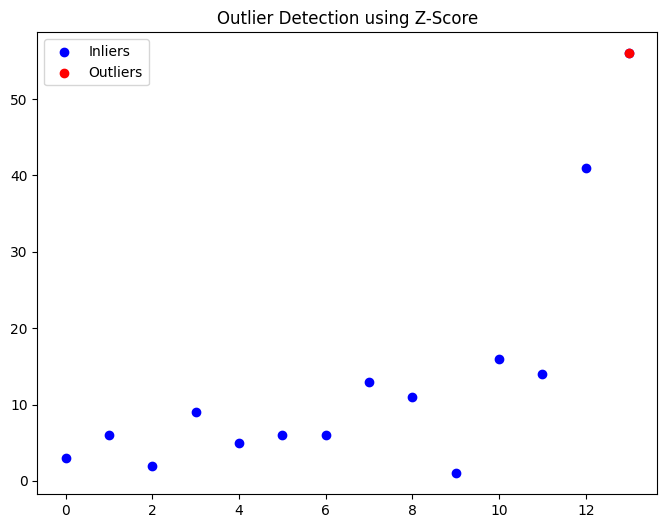

In [25]:
# Visualize outliers

plt.figure(figsize=(8, 6))
plt.scatter(range(len(data)), data, c='blue', label='Inliers')
plt.scatter(outliers_zscore, data[outliers_zscore], c='red', label='Outliers')
plt.title("Outlier Detection using Z-Score")
plt.legend()
plt.show()

In [2]:
df = pd.read_csv('/kaggle/input/abc-csv/abc.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df[['PassengerId','Survived','Pclass','SibSp','Parch']]

,PassengerId,Survived,Pclass,SibSp,Parch
0,1,0,3,1,0
1,2,1,1,1,0
2,3,1,3,0,0
3,4,1,1,1,0
4,5,0,3,0,0
...,...,...,...,...,...
886,887,0,2,0,0
887,888,1,1,0,0
888,889,0,3,1,2
889,890,1,1,0,0


In [4]:
Q1 = np.percentile(df['Age'], 25)

Q3 = np.percentile(df['Age'], 75)

IQR = Q3 - Q1

In [14]:
iqr_threshold = 1.5

outliers_iqr = np.where((df['Age'] < (Q1 - iqr_threshold * IQR)) | (df['Age'] > (Q3 + iqr_threshold * IQR)))[0]

In [6]:
outliers_iqr

array([], dtype=int64)

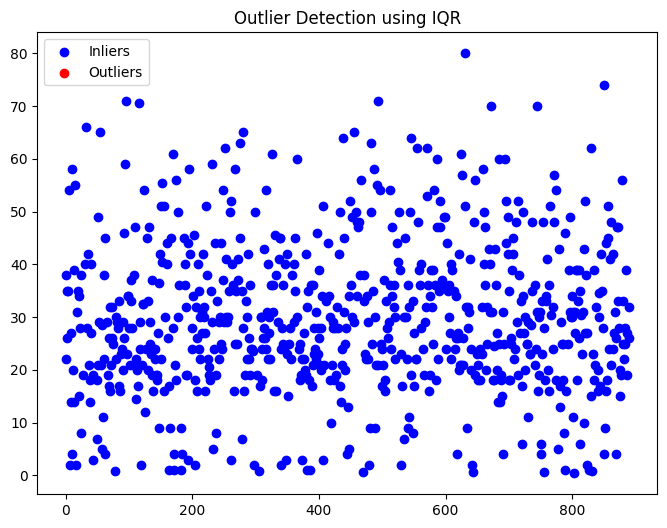

In [7]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['Age'])), df['Age'], c='blue', label='Inliers')
plt.scatter(outliers_iqr, df['Age'][outliers_iqr], c='red', label='Outliers')
plt.title("Outlier Detection using IQR")
plt.legend()
plt.show()

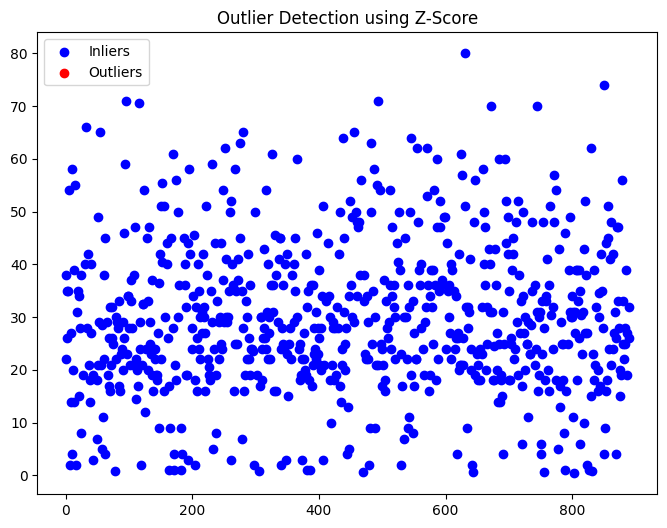

In [8]:
z_scores = zscore(df['Age'])
z_threshold = 2
outliers_zscore = np.where(np.abs(z_scores) > z_threshold)[0]
plt.figure(figsize=(8, 6))
plt.scatter(range(len(df['Age'])), df['Age'], c='blue', label='Inliers')
plt.scatter(outliers_zscore, df['Age'][outliers_zscore], c='red', label='Outliers')
plt.title("Outlier Detection using Z-Score")
plt.legend()
plt.show()

In [9]:
outliers_zscore

array([], dtype=int64)

In [10]:
df.iloc[outliers_zscore]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [11]:
dff=df

In [12]:
dd=df.drop(outliers_zscore)
dd

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
deee=dff.replace(df['Age'][outliers_zscore],b)
deee

NameError: name 'b' is not defined